<a href="https://colab.research.google.com/github/Nithyasri-Babu/AirPassengers/blob/main/AirPassengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [9]:
# Load dataset
data = pd.read_csv("/content/AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Set monthly frequency explicitly
data = data.asfreq('MS')



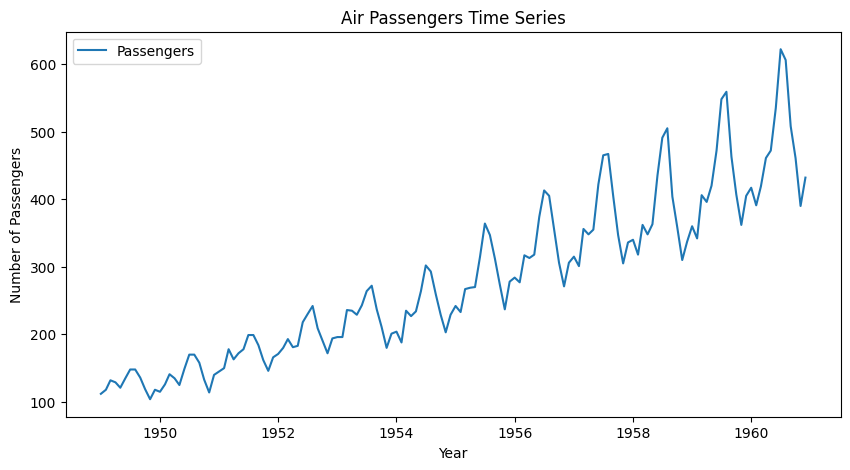

In [10]:
plt.figure(figsize=(10,5))
plt.plot(data, label='Passengers')
plt.title("Air Passengers Time Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


In [11]:
# Split data (80% train, 20% test)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

print("Train size:", len(train))
print("Test size:", len(test))


Train size: 115
Test size: 29


In [12]:
# Build ARIMA model
model = ARIMA(train, order=(5,1,0))  # (p,d,q)
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -524.549
Date:                Thu, 25 Dec 2025   AIC                           1061.098
Time:                        03:57:56   BIC                           1077.515
Sample:                    01-01-1949   HQIC                          1067.760
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3558      0.092      3.854      0.000       0.175       0.537
ar.L2         -0.2644      0.109     -2.422      0.015      -0.478      -0.050
ar.L3          0.0847      0.078      1.089      0.2

In [13]:
# Forecast for test period
forecast = model_fit.forecast(steps=len(test))

# Convert forecast to Series
forecast = pd.Series(forecast, index=test.index)


In [14]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)


RMSE: 80.66394527011326


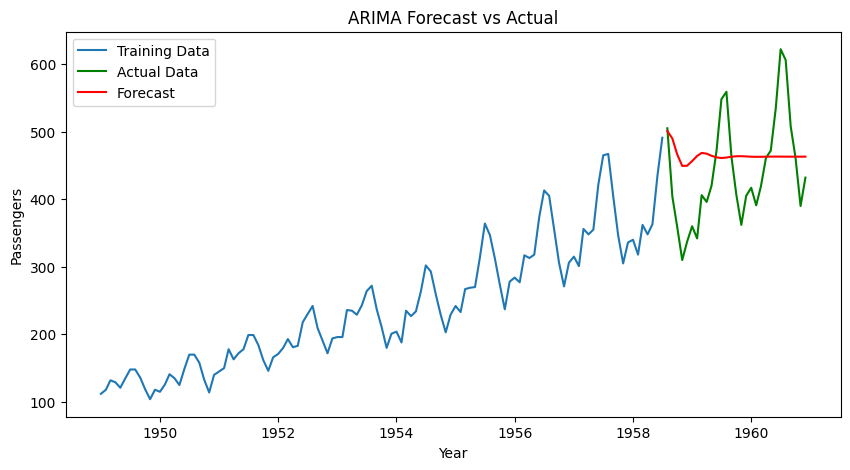

In [15]:
plt.figure(figsize=(10,5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data', color='green')
plt.plot(forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()
